<a href="https://colab.research.google.com/github/joezerr/Project/blob/main/Assignment_2_no_2_(High_pass_filtering).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Learning experience:
The advantages of doing filter using fourier transform instead of using convolutional based filtering is that we can play within the fourier space. We know that the centre of the image represents the low frequency and the outer represents the high frequency. Thus, we can then apply a mask and play with the frequency with how we want it, Be it high or low frequency. Most information lies in low frequency while edges lie in high frequency

references are taken from:
- https://www.bogotobogo.com/python/OpenCV_Python/python_opencv3_Image_Fourier_Transform_FFT_DFT.php

- https://docs.opencv.org/3.4/de/dbc/tutorial_py_fourier_transform.html

- https://github.com/bnsreenu/python_for_image_processing_APEER/blob/master/tutorial41_image_filters_using_fourier_transform_DFT.py 

- https://asset.kompas.com/crops/ncgvDkq11ovx_624dxbv483x_iY=/0x0:648x432/750x500/data/photo/2021/10/05/615c371c61b81.jpg

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow #used to show image since cv2.imshow isnt applicable in google colab
from skimage import io #used to import image from the internet

In [ ]:
source = 'https://asset.kompas.com/crops/ncgvDkq11ovx_624dxbv483x_iY=/0x0:648x432/750x500/data/photo/2021/10/05/615c371c61b81.jpg' #ill be using panda image. The next step is to make it grayscale
image = io.imread(source)[:,:,0] # gray-scale image

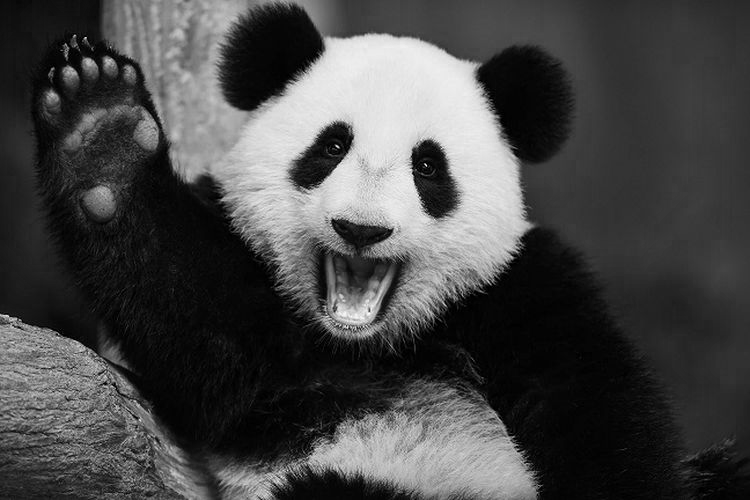

In [ ]:
cv2_imshow(image)

FOURIER TRANSFORM

In [ ]:
#we need to convert the image to float32 because fourier only works on floating point images 
#the output of this Fourier Transform is a 2d complex array. First channel will output the real part while the second will output imaginary part, choose cv2.DFT_COMPLEX_OUTPUT
dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)

#shift the zero frequency of the fourier transform component to the center of the array to ease the visualization
dft_shift = np.fft.fftshift(dft)

#extract the magnitude by calculating the spectrum from DFt (real part and imaginary part)
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))

In [ ]:
#High Pass Filtering

#circular mask, centre circle contain zeros, the rest contain ones
#only allow high frequency to pass
rows, cols = image.shape
crow, ccol = int(rows / 2), int(cols / 2)

#create mask with same size as image and fill it with ones
mask = np.ones((rows, cols, 2), np.uint8)
r = 80
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]

#filled center with zeros
mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r*r
mask[mask_area] = 0

In [ ]:
#apply the mask
fshift = dft_shift * mask

In [ ]:
#store the magnitude spectrum for plottting
fshift_mask_mag = 20 * np.log(cv2.magnitude(fshift[:, :, 0], fshift[:, :, 1]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


In [ ]:
#inverse back to top left
f_ishift = np.fft.ifftshift(fshift)

In [ ]:
#inverse the DFT (back to image domain)
img_back = cv2.idft(f_ishift)

In [ ]:
#Extract the magnitude
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])

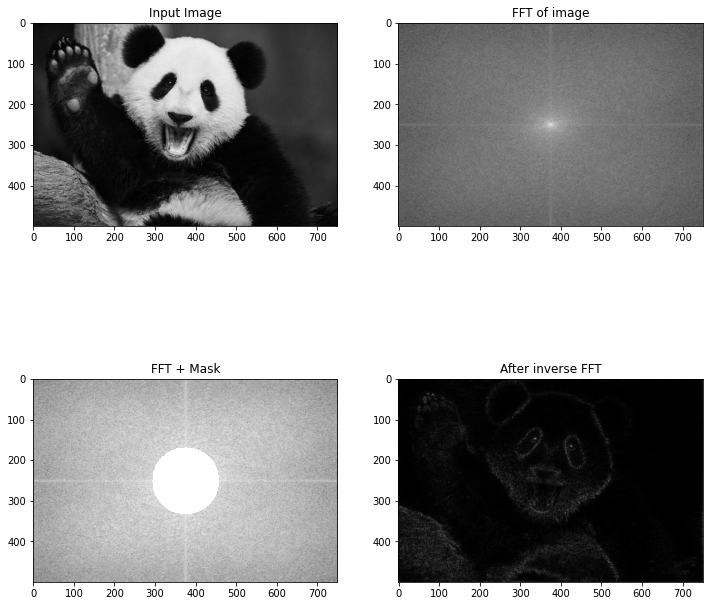

In [ ]:
#plot the figure
fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(image, cmap='gray')
ax1.title.set_text('Input Image')
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(magnitude_spectrum, cmap='gray')
ax2.title.set_text('FFT of image')
ax3 = fig.add_subplot(2,2,3)
ax3.imshow(fshift_mask_mag, cmap='gray')
ax3.title.set_text('FFT + Mask')
ax4 = fig.add_subplot(2,2,4)
ax4.imshow(img_back, cmap='gray')
ax4.title.set_text('After inverse FFT')
plt.show()